<a href="https://colab.research.google.com/github/Sreelakshmi-2005-cs/Titanic_Prediction/blob/main/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv


In [3]:
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


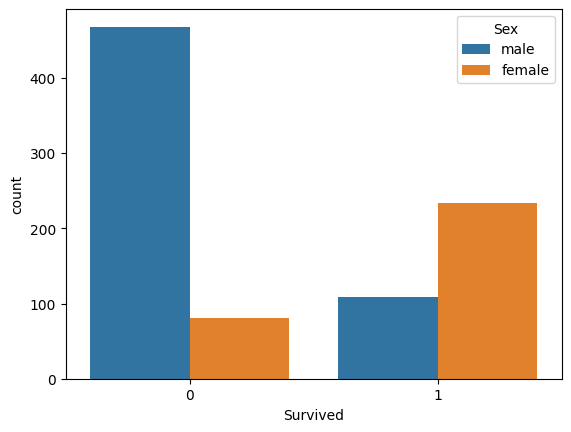

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

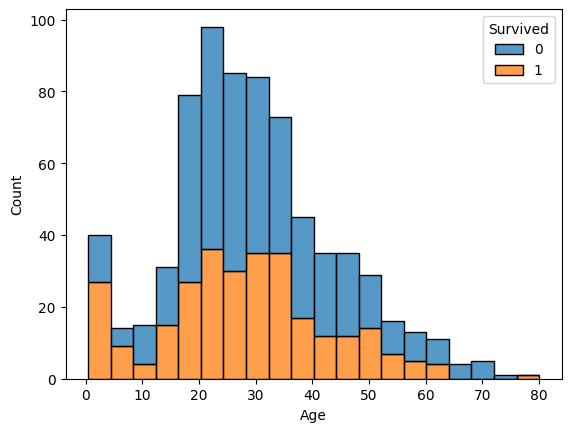

In [6]:
sns.histplot(x='Age',hue='Survived',data=train,multiple='stack',bins=20)

In [7]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
train['Sex'].head()


,Sex
0,male
1,female
2,female
3,female
4,male


In [18]:
train['Sex'] = train['Sex'].map({'male':0,'female':1})
test['Sex']= train['Sex'].map({'male':0,'female':1})

In [9]:
train['Sex'].head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [20]:
train['Age'].isnull().sum()

np.int64(0)

In [21]:
train['Age']=train['Age'].fillna(train['Age'].median())

In [22]:
train['AgeBand']=pd.cut(train['Age'],bins=[0,12,18,35,60,80],labels=['Child','Teen','YoungAdult','Adult','Senior'])

In [23]:
train['AgeBand'] = train['AgeBand'].cat.codes

In [24]:
X=train[['Sex','AgeBand']]

In [25]:
X=train[['Sex','AgeBand']]
y=train['Survived']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred))

Accuracy: 0.7879213483146067
